In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from scipy import fftpack
from scipy import spatial

### Import dataset and describe

In [2]:
plano = pd.read_csv(r"D:\Dodro\Timeseries Data_Labwalk\2025-05-16_10-34-36-033be9bd_plano\imu_plano.csv", sep=",")
arriba = pd.read_csv(r"D:\Dodro\Timeseries Data_Labwalk\2025-05-16_10-35-32-372a83fe_abajo\imu_abajo.csv", sep=",")
abajo = pd.read_csv(r"D:\Dodro\Timeseries Data_Labwalk\2025-05-16_10-35-55-218658aa_arriba\imu_arriba.csv", sep=",")

In [3]:
plano

section id  \
0     d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
1     d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
2     d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
3     d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
4     d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
...                                    ...   
1051  d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
1052  d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
1053  d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
1054  d9fce17c-a8f4-4cea-95b6-54c5760c73d9   
1055  d9fce17c-a8f4-4cea-95b6-54c5760c73d9   

                              recording id       timestamp [ns]  \
0     033be9bd-b08b-4384-9ed7-b98b536c6281  1747384478891986205   
1     033be9bd-b08b-4384-9ed7-b98b536c6281  1747384478902100205   
2     033be9bd-b08b-4384-9ed7-b98b536c6281  1747384478912214205   
3     033be9bd-b08b-4384-9ed7-b98b536c6281  1747384478920893205   
4     033be9bd-b08b-4384-9ed7-b98b536c6281  1747384478929573205   
...                                    ...                  ...   
1051  033be9bd-b08b-4384-9ed7-b98b536c6281  1747384488898178205   
1052  033be9bd-b08b-4384-9ed7-b98b536c6281  1747384488905922205   
1053  033be9bd-b08b-4384-9ed7-b98b536c6281  1747384488913664205   
1054  033be9bd-b08b-4384-9ed7-b98b536c6281  1747384488921406205   
1055  033be9bd-b08b-4384-9ed7-b98b536c6281  1747384488929148205   

      gyro x [deg/s]  gyro y [deg/s]  gyro z [deg/s]  acceleration x [g]  \
0          10.560989       -0.978470        0.547409           -0.033691   
1          10.316849       -0.795364        0.120163           -0.032715   
2          10.377884       -0.978470        0.547409           -0.042480   
3          10.072708       -0.795364        0.303268           -0.030762   
4           9.582520       -0.854492        0.120163           -0.036133   
...              ...             ...             ...                 ...   
1051        0.183105       -2.563477       -0.856400           -0.047852   
1052       -0.181198       -2.443314       -0.307083           -0.042480   
1053        0.000000       -2.197266       -0.246048           -0.050781   
1054        0.123978       -2.199173       -0.123978           -0.044922   
1055        0.061035       -2.197266        0.000000           -0.038574   

      acceleration y [g]  acceleration z [g]  roll [deg]  pitch [deg]  \
0              -0.057617            0.998535    0.845474    -4.443640   
1              -0.055176            0.986328    0.843890    -4.344191   
2              -0.058594            0.985352    0.846314    -4.246050   
3              -0.044434            0.985352    0.845886    -4.051271   
4              -0.052734            0.986328    0.845289    -3.961776   
...                  ...                 ...         ...          ...   
1051           -0.667969            0.739746    0.412725   -43.013313   
1052           -0.667969            0.755371    0.410689   -42.999211   
1053           -0.658691            0.754395    0.417309   -42.987717   
1054           -0.656738            0.740234    0.423721   -42.978173   
1055           -0.665527            0.747070    0.427826   -42.965204   

      yaw [deg]  quaternion w  quaternion x  quaternion y  quaternion z  
0    -42.107809      0.932413     -0.033531      0.020807     -0.359233  
1    -42.103905      0.932459     -0.032727      0.020482     -0.359207  
2    -42.101286      0.932499     -0.031921      0.020194     -0.359192  
3    -42.095710      0.932578     -0.030338      0.019579     -0.359157  
4    -42.094552      0.932610     -0.029612      0.019294     -0.359152  
...         ...           ...           ...           ...           ...  
1051 -71.804932      0.752840     -0.294993      0.217695     -0.546645  
1052 -71.783226      0.752984     -0.294951      0.217559     -0.546523  
1053 -71.765704      0.753085     -0.294877      0.217503     -0.546446  
1054 -71.748533      0.753180     -0.294816      0.217455     -0.546367  
1055 -71.733040      0.753279     -0.294740      0.217381     -0.54630

In [4]:
print(plano.describe())
print("-------------------------")
print(arriba.describe())
print("-------------------------")
print(abajo.describe())


       timestamp [ns]  gyro x [deg/s]  gyro y [deg/s]  gyro z [deg/s]  \
count    1.056000e+03     1056.000000     1056.000000     1056.000000   
mean     1.747384e+18       -4.135712        0.333062       -2.913728   
std      2.903709e+09        9.472373        6.237070        9.347429   
min      1.747384e+18      -47.849655      -14.406204      -36.500931   
25%      1.747384e+18       -7.749557       -3.540516       -9.782791   
50%      1.747384e+18       -2.959252       -0.183105       -0.886918   
75%      1.747384e+18        0.732422        4.104137        3.110886   
max      1.747384e+18       27.709961       17.333984       18.186569   

       acceleration x [g]  acceleration y [g]  acceleration z [g]  \
count         1056.000000         1056.000000         1056.000000   
mean            -0.043998           -0.213490            0.959636   
std              0.090418            0.173208            0.138987   
min             -0.245117           -0.685059            0.725586 

In [5]:
print(plano.info())
print("-------------------------")
print(arriba.info())
print("-------------------------")
print(abajo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   section id          1056 non-null   object 
 1   recording id        1056 non-null   object 
 2   timestamp [ns]      1056 non-null   int64  
 3   gyro x [deg/s]      1056 non-null   float64
 4   gyro y [deg/s]      1056 non-null   float64
 5   gyro z [deg/s]      1056 non-null   float64
 6   acceleration x [g]  1056 non-null   float64
 7   acceleration y [g]  1056 non-null   float64
 8   acceleration z [g]  1056 non-null   float64
 9   roll [deg]          1056 non-null   float64
 10  pitch [deg]         1056 non-null   float64
 11  yaw [deg]           1056 non-null   float64
 12  quaternion w        1056 non-null   float64
 13  quaternion x        1056 non-null   float64
 14  quaternion y        1056 non-null   float64
 15  quaternion z        1056 non-null   float64
dtypes: flo

In [10]:
print(df_1.columns)
print("-------------------------")
print(df_2.columns)
print("-------------------------")
print(df_3.columns)

Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y',
       'quaternion z'],
      dtype='object')
-------------------------
Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y',
       'quaternion z'],
      dtype='object')
-------------------------
Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y'

### Define time in seconds

In [6]:
plano['timestamp'] = plano['timestamp [ns]'] * 1e-9
abajo['timestamp'] = abajo['timestamp [ns]'] * 1e-9
arriba['timestamp'] = arriba['timestamp [ns]'] * 1e-9

In [11]:
dt = np.diff(arriba['timestamp'])

In [12]:
print(f"Average sample interval: {np.mean(dt):.6f} seconds")
print(f"Estimated sampling frequency: {1 / np.mean(dt):.2f} Hz")

Average sample interval: 0.009498 seconds
Estimated sampling frequency: 105.29 Hz


### Plot angular velocities

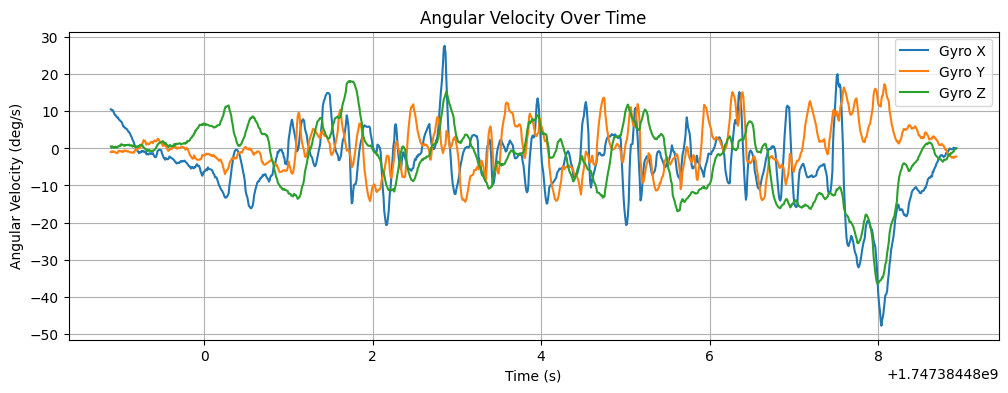

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(plano['timestamp'], plano['gyro x [deg/s]'], label='Gyro X')
plt.plot(plano['timestamp'], plano['gyro y [deg/s]'], label='Gyro Y')
plt.plot(plano['timestamp'], plano['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

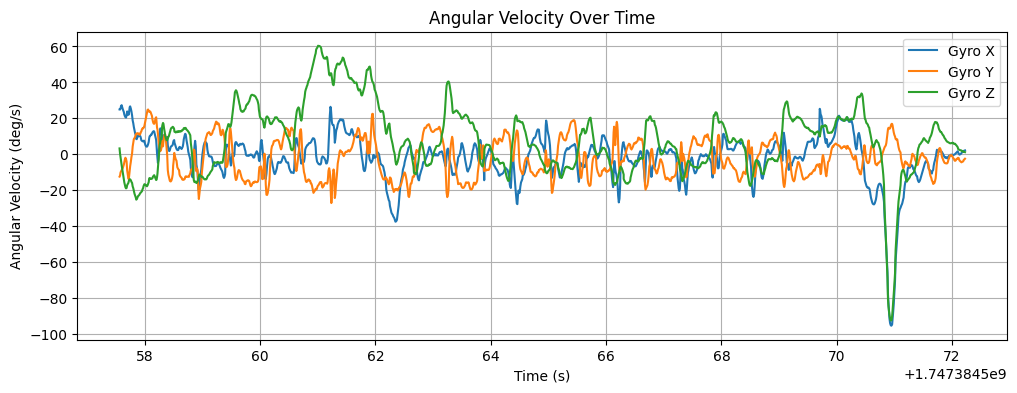

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(abajo['timestamp'], abajo['gyro x [deg/s]'], label='Gyro X')
plt.plot(abajo['timestamp'], abajo['gyro y [deg/s]'], label='Gyro Y')
plt.plot(abajo['timestamp'], abajo['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

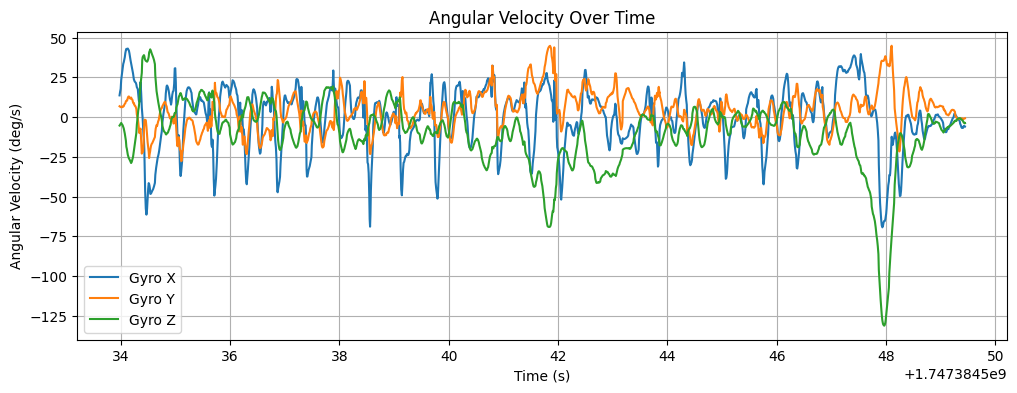

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(arriba['timestamp'], arriba['gyro x [deg/s]'], label='Gyro X')
plt.plot(arriba['timestamp'], arriba['gyro y [deg/s]'], label='Gyro Y')
plt.plot(arriba['timestamp'], arriba['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

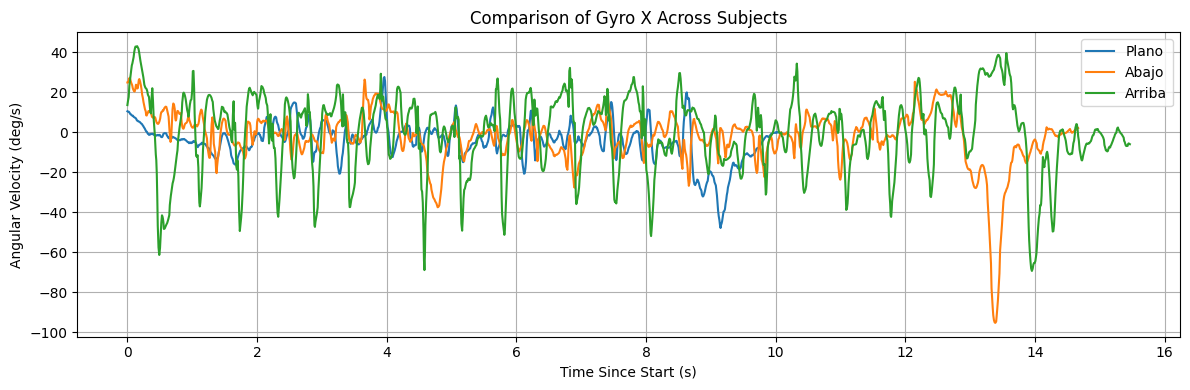

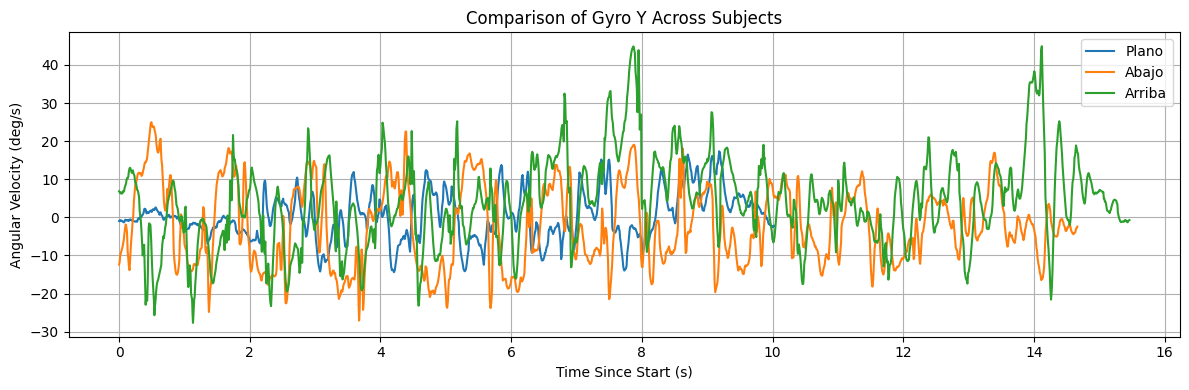

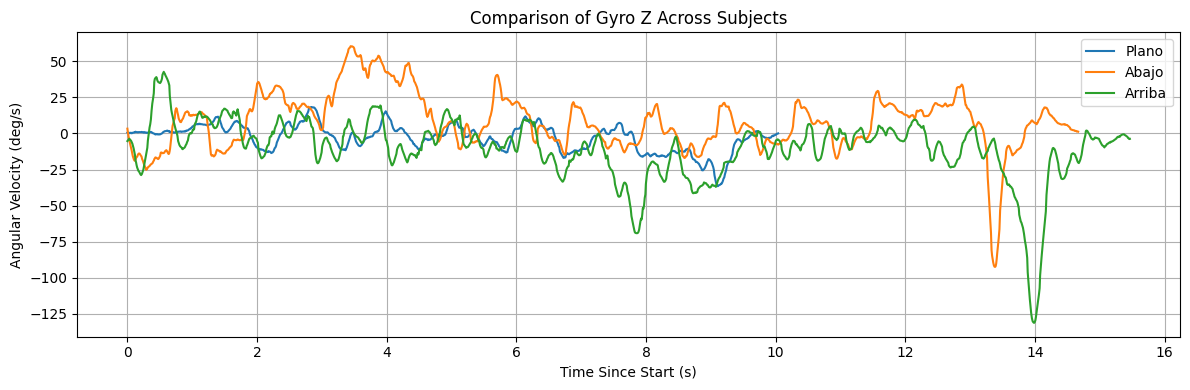

In [17]:
import matplotlib.pyplot as plt

# Optional: normalize time to start at 0 for each subject
normalize_time = True

# Make a copy so original data is unchanged
df_1c = plano.copy()
df_2c = abajo.copy()
df_3c = arriba.copy()

if normalize_time:
    df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
    df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
    df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_1c['timestamp'], df_1c[f'gyro {axis} [deg/s]'], label='Plano')
    plt.plot(df_2c['timestamp'], df_2c[f'gyro {axis} [deg/s]'], label='Abajo')
    plt.plot(df_3c['timestamp'], df_3c[f'gyro {axis} [deg/s]'], label='Arriba')
    
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')


In [18]:
#Angular speed 1
plano['angular_speed'] = np.sqrt(plano['gyro x [deg/s]']**2 +
                               plano['gyro y [deg/s]']**2 +
                               plano['gyro z [deg/s]']**2)

#Angular speed 2
arriba['angular_speed'] = np.sqrt(arriba['gyro x [deg/s]']**2 +
                               arriba['gyro y [deg/s]']**2 +
                               arriba['gyro z [deg/s]']**2)

#Angular speed 3
abajo['angular_speed'] = np.sqrt(abajo['gyro x [deg/s]']**2 +
                               abajo['gyro y [deg/s]']**2 +
                               abajo['gyro z [deg/s]']**2)

### Head movement

In [19]:
peaks1, _ = signal.find_peaks(plano['angular_speed'], height=50)
peaks2, _ = signal.find_peaks(arriba['angular_speed'], height=50)
peaks3, _ = signal.find_peaks(abajo['angular_speed'], height=50)

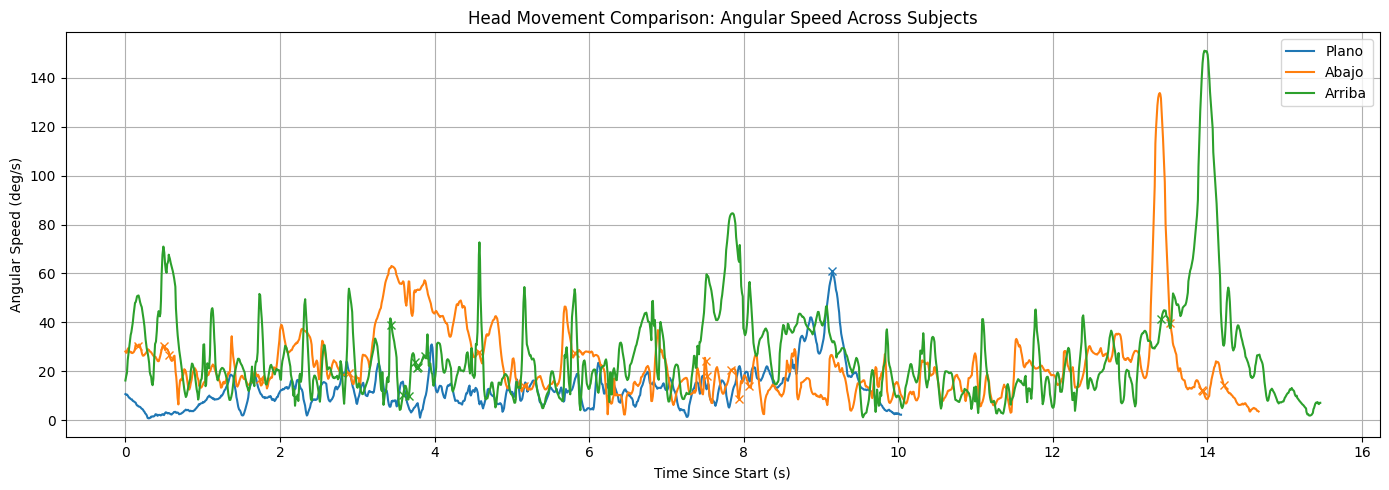

In [20]:
df_1c = plano.copy()
df_2c = abajo.copy()
df_3c = arriba.copy()

df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# Plot all three in one figure
plt.figure(figsize=(14, 5))

# Subject 1
plt.plot(df_1c['timestamp'], df_1c['angular_speed'], label='Plano', color='C0')
plt.plot(df_1c['timestamp'].iloc[peaks1], df_1c['angular_speed'].iloc[peaks1], 'x', color='C0')

# Subject 2
plt.plot(df_2c['timestamp'], df_2c['angular_speed'], label='Abajo', color='C1')
plt.plot(df_2c['timestamp'].iloc[peaks2], df_2c['angular_speed'].iloc[peaks2], 'x', color='C1')

# Subject 3
plt.plot(df_3c['timestamp'], df_3c['angular_speed'], label='Arriba', color='C2')
plt.plot(df_3c['timestamp'].iloc[peaks3], df_3c['angular_speed'].iloc[peaks3], 'x', color='C2')

# Formatting
plt.title("Head Movement Comparison: Angular Speed Across Subjects")
plt.xlabel("Time Since Start (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Head orientation

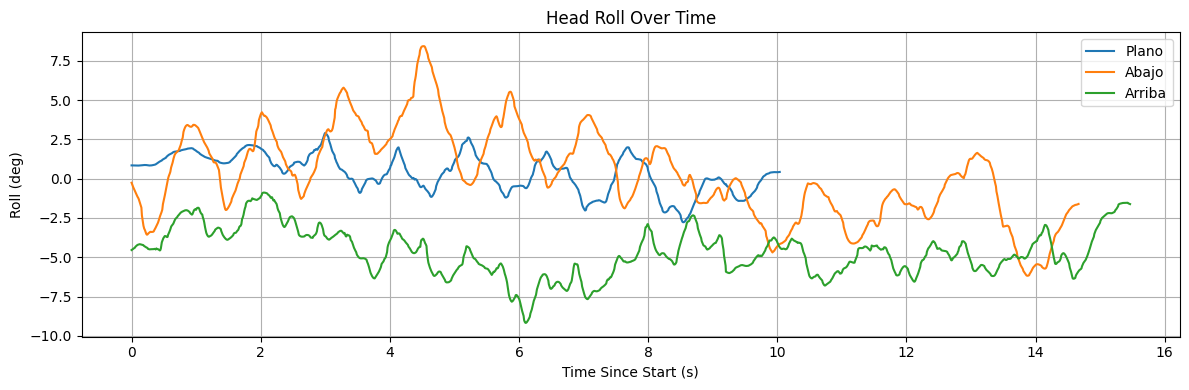

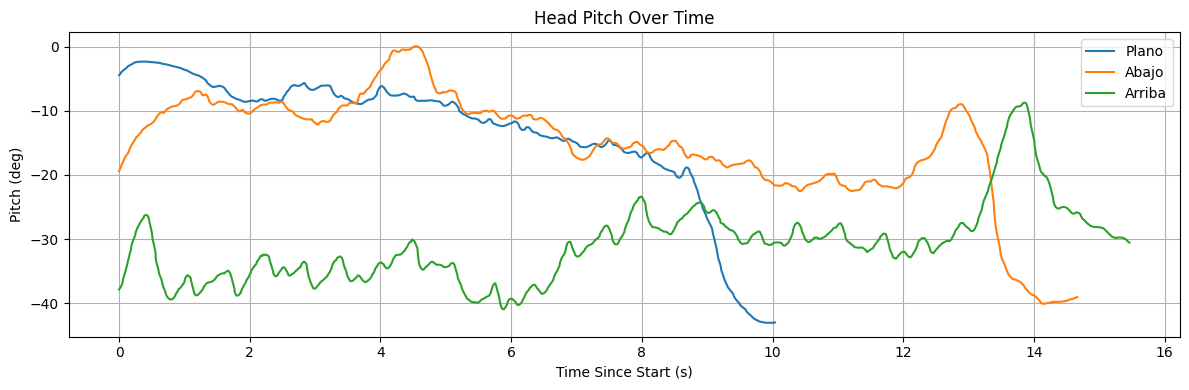

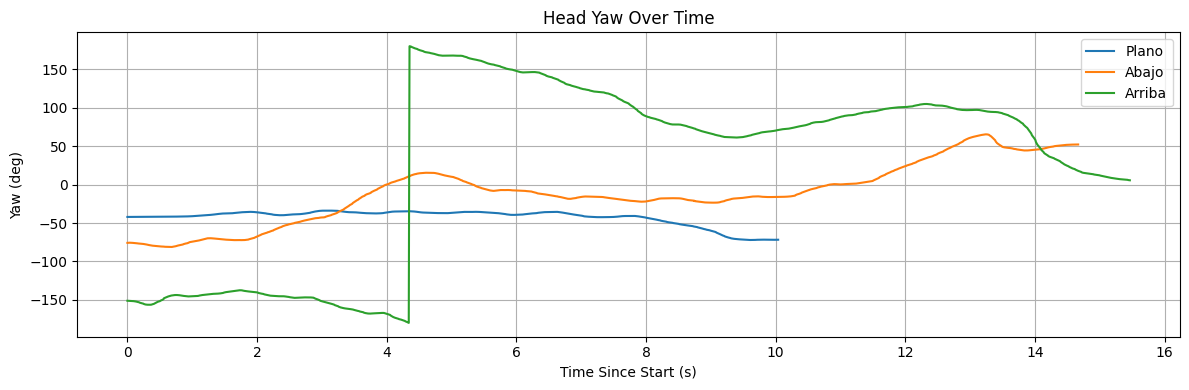

In [22]:
df_1c = plano.copy()
df_2c = abajo.copy()
df_3c = arriba.copy()

df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# General plotting function for orientation angles
def plot_orientation(angle):
    plt.figure(figsize=(12, 4))

    plt.plot(df_1c['timestamp'], df_1c[f'{angle} [deg]'], label='Plano', color='C0')
    plt.plot(df_2c['timestamp'], df_2c[f'{angle} [deg]'], label='Abajo', color='C1')
    plt.plot(df_3c['timestamp'], df_3c[f'{angle} [deg]'], label='Arriba', color='C2')

    plt.title(f'Head {angle.capitalize()} Over Time')
    plt.xlabel('Time Since Start (s)')
    plt.ylabel(f'{angle.capitalize()} (deg)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate plots for roll, pitch, yaw
plot_orientation('roll')
plot_orientation('pitch')
plot_orientation('yaw')


### Angular speed

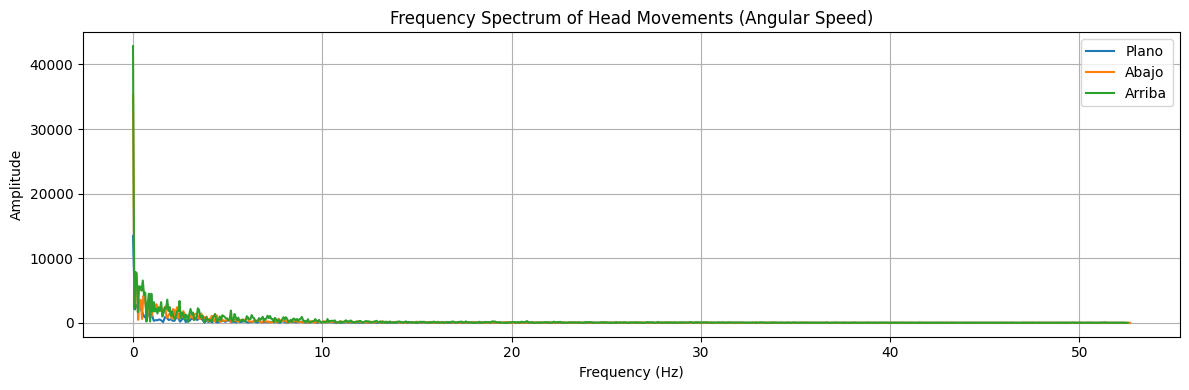

In [24]:

def compute_fft(df):
    n = len(df)
    dt = np.mean(np.diff(df['timestamp']))  # mean sampling interval (s)
    freq = np.fft.fftfreq(n, d=dt)
    spectrum = np.abs(np.fft.fft(df['angular_speed']))
    return freq[:n//2], spectrum[:n//2]  # return only positive frequencies

# Compute FFTs
freq1, spec1 = compute_fft(plano)
freq2, spec2 = compute_fft(abajo)
freq3, spec3 = compute_fft(arriba)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(freq1, spec1, label='Plano', color='C0')
plt.plot(freq2, spec2, label='Abajo', color='C1')
plt.plot(freq3, spec3, label='Arriba', color='C2')

plt.title("Frequency Spectrum of Head Movements (Angular Speed)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Compare with Dodro

In [25]:
df_1 = pd.read_csv(r"D:\Dodro\2024-06-01_09-39-50-0f99a26b\imu_0f99a26b.csv", sep=",")
df_2 = pd.read_csv(r"D:\Dodro\2024-06-01_09-53-54-ad972601\imu_ad972601.csv", sep=",")
df_3 = pd.read_csv(r"D:\Dodro\2024-06-01_10-16-28-6cb73456\imu_6cb73456.csv", sep=",")
df_4 = pd.read_csv(r"D:\Dodro\2024-06-01_10-33-11-a8ed7c11\imu_a8ed7c11.csv", sep=",")
df_5 = pd.read_csv(r"D:\Dodro\2024-06-01_11-06-42-9bb8a4e9\imu_9bb8a4e9.csv", sep=",")
df_6 = pd.read_csv(r"D:\Dodro\2024-06-01_11-17-58-40eae19a\imu_40eae19a.csv", sep=",")
df_7 = pd.read_csv(r"D:\Dodro\2024-06-01_11-30-58-9721aa47\imu_9721aa47.csv", sep=",")

In [26]:
df_1['timestamp'] = df_1['timestamp [ns]'] * 1e-9
df_2['timestamp'] = df_2['timestamp [ns]'] * 1e-9
df_3['timestamp'] = df_3['timestamp [ns]'] * 1e-9
df_4['timestamp'] = df_4['timestamp [ns]'] * 1e-9
df_5['timestamp'] = df_5['timestamp [ns]'] * 1e-9
df_6['timestamp'] = df_6['timestamp [ns]'] * 1e-9
df_7['timestamp'] = df_7['timestamp [ns]'] * 1e-9

In [27]:
#Angular speed 1
df_1['angular_speed'] = np.sqrt(df_1['gyro x [deg/s]']**2 +
                               df_1['gyro y [deg/s]']**2 +
                               df_1['gyro z [deg/s]']**2)

#Angular speed 2
df_2['angular_speed'] = np.sqrt(df_2['gyro x [deg/s]']**2 +
                               df_2['gyro y [deg/s]']**2 +
                               df_2['gyro z [deg/s]']**2)

#Angular speed 3
df_3['angular_speed'] = np.sqrt(df_3['gyro x [deg/s]']**2 +
                               df_3['gyro y [deg/s]']**2 +
                               df_3['gyro z [deg/s]']**2)

#Angular speed 4
df_4['angular_speed'] = np.sqrt(df_4['gyro x [deg/s]']**2 +
                               df_4['gyro y [deg/s]']**2 +
                               df_4['gyro z [deg/s]']**2)

#Angular speed 5
df_5['angular_speed'] = np.sqrt(df_5['gyro x [deg/s]']**2 +
                               df_5['gyro y [deg/s]']**2 +
                               df_5['gyro z [deg/s]']**2)

#Angular speed 6
df_6['angular_speed'] = np.sqrt(df_6['gyro x [deg/s]']**2 +
                               df_6['gyro y [deg/s]']**2 +
                               df_6['gyro z [deg/s]']**2)

#Angular speed 7
df_7['angular_speed'] = np.sqrt(df_7['gyro x [deg/s]']**2 +
                               df_7['gyro y [deg/s]']**2 +
                               df_7['gyro z [deg/s]']**2)

In [28]:
peaks1, _ = signal.find_peaks(df_1['angular_speed'], height=50)
peaks2, _ = signal.find_peaks(df_2['angular_speed'], height=50)
peaks3, _ = signal.find_peaks(df_3['angular_speed'], height=50)
peaks4, _ = signal.find_peaks(df_4['angular_speed'], height=50)
peaks5, _ = signal.find_peaks(df_5['angular_speed'], height=50)
peaks6, _ = signal.find_peaks(df_6['angular_speed'], height=50)
peaks7, _ = signal.find_peaks(df_7['angular_speed'], height=50)

In [76]:
df_1c.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y',
       'quaternion z', 'timestamp', 'angular_speed'],
      dtype='object')

### Subject1

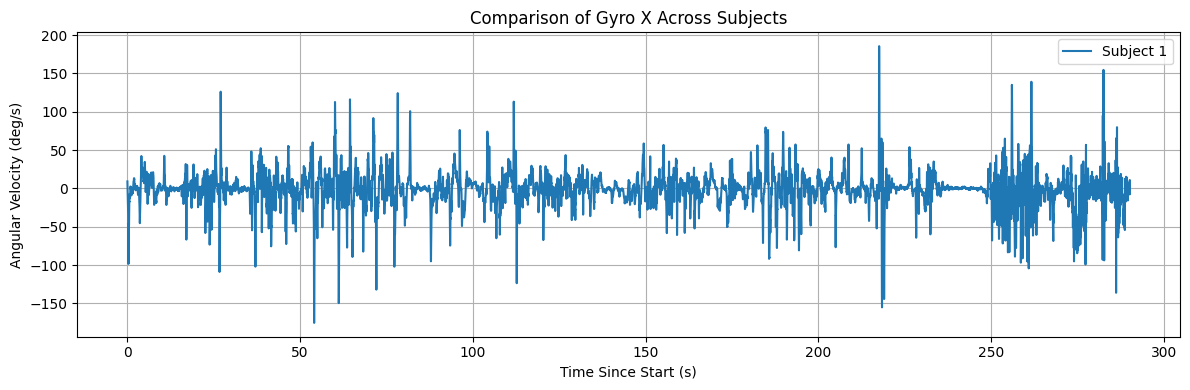

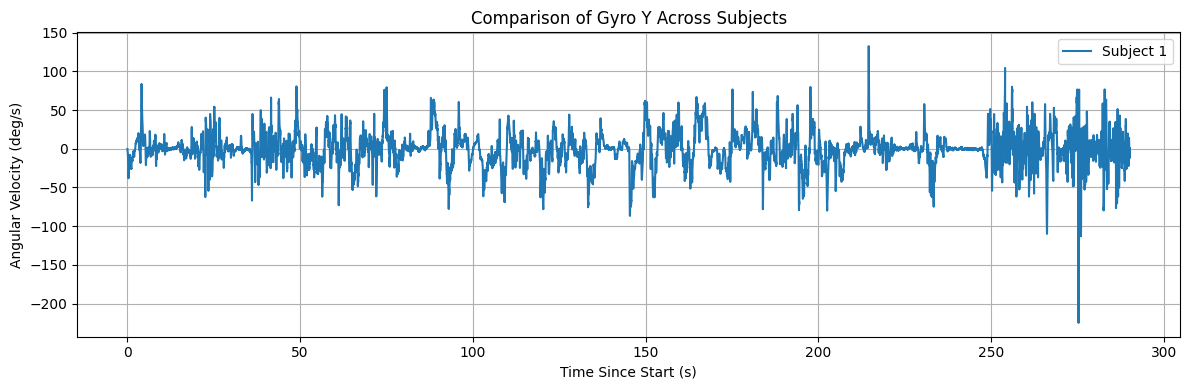

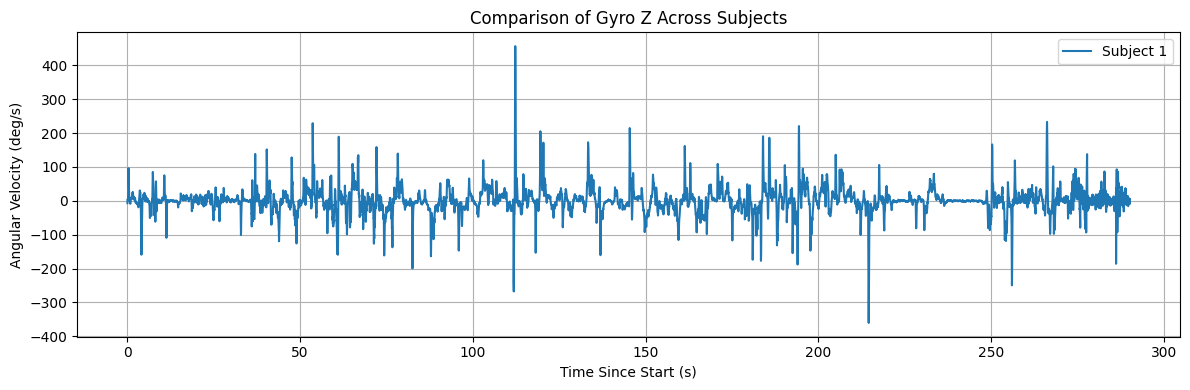

In [36]:
normalize_time = True

# Make a copy so original data is unchanged
df_1c = df_1.copy()

if normalize_time:
    df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_1c['timestamp'], df_1c[f'gyro {axis} [deg/s]'], label='Subject 1')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')


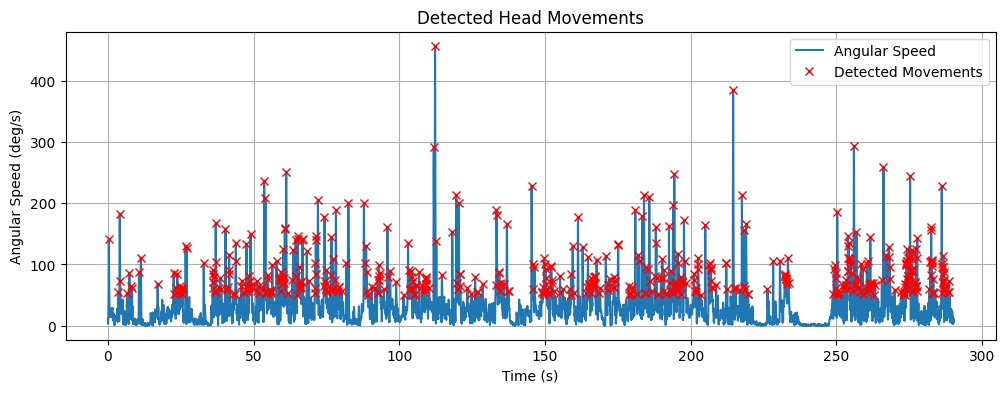

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(df_1c['timestamp'], df_1c['angular_speed'], label='Angular Speed')
plt.plot(df_1c['timestamp'].iloc[peaks1], df_1c['angular_speed'].iloc[peaks1], "rx", label="Detected Movements")
plt.title("Detected Head Movements")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
num_movements = len(peaks1)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_1c['timestamp'].iloc[peaks1].values,
    'angular_speed': df_1c['angular_speed'].iloc[peaks1].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 521

Descriptive Statistics of Detected Movements (Angular Speed):
count    521.000000
mean      88.823991
std       45.805150
min       50.084482
25%       60.875585
50%       73.511348
75%      101.219064
max      456.738143
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    520.000000
mean       0.554655
std        1.095778
min        0.012227
25%        0.092892
50%        0.215340
75%        0.543526
max       15.162414
dtype: float64


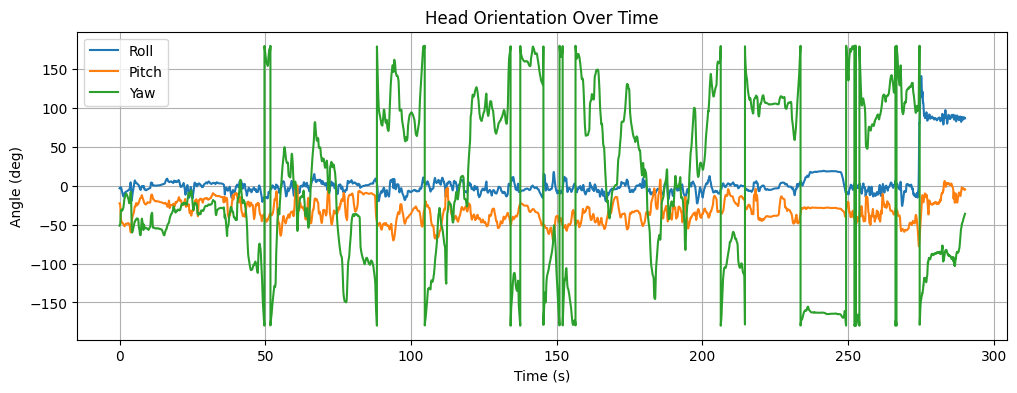

In [39]:
plt.figure(figsize=(12, 4))
plt.plot(df_1c['timestamp'], df_1c['roll [deg]'], label='Roll')
plt.plot(df_1c['timestamp'], df_1c['pitch [deg]'], label='Pitch')
plt.plot(df_1c['timestamp'], df_1c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

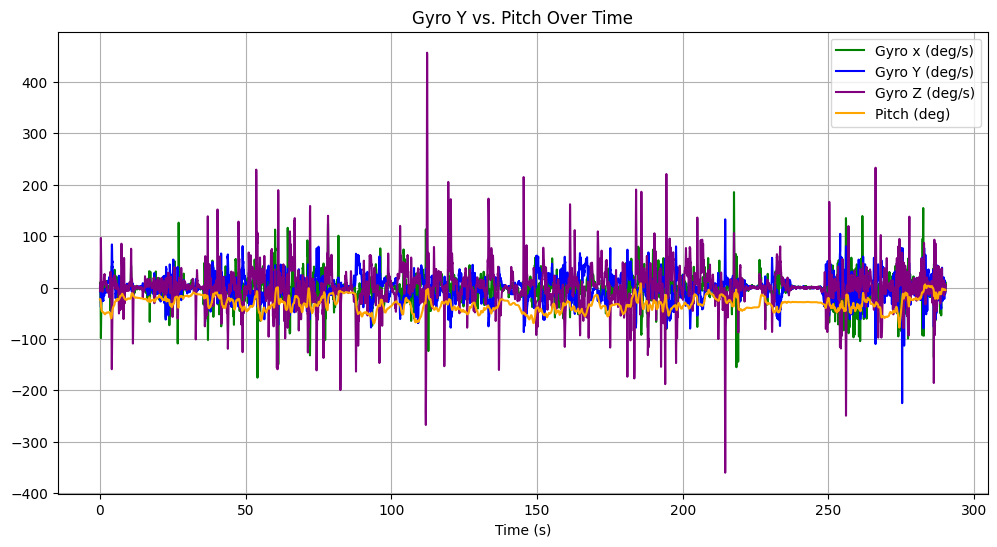

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df_1c['timestamp'], df_1c['gyro x [deg/s]'], label='Gyro x (deg/s)', color='green')
plt.plot(df_1c['timestamp'], df_1c['gyro y [deg/s]'], label='Gyro Y (deg/s)', color='blue')
plt.plot(df_1c['timestamp'], df_1c['gyro z [deg/s]'], label='Gyro Z (deg/s)', color='purple')
plt.plot(df_1c['timestamp'], df_1c['pitch [deg]'], label='Pitch (deg)', color='orange')
plt.title('Gyro Y vs. Pitch Over Time')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
df_1c['pitch_derivative'] = df_1c['pitch [deg]'].diff() / df_1c['timestamp'].diff()
correlation = df_1c[['gyro z [deg/s]', 'pitch_derivative']].corr().iloc[0,1]
print(f"Correlation between Gyro Y and Pitch derivative: {correlation:.2f}")


Correlation between Gyro Y and Pitch derivative: 0.01


In [88]:
df_1c['roll_derivative'] = df_1c['roll [deg]'].diff() / df_1c['timestamp'].diff()
df_1c['pitch_derivative'] = df_1c['pitch [deg]'].diff() / df_1c['timestamp'].diff()
df_1c['yaw_derivative'] = df_1c['yaw [deg]'].diff() / df_1c['timestamp'].diff()

# print("Correlations with gyro_y:")
# print("  Roll derivative:  ", df_1c[['gyro_y [deg/s]', 'roll_derivative']].corr().iloc[0,1])
# print("  Pitch derivative: ", df_1c[['gyro_y [deg/s]', 'pitch_derivative']].corr().iloc[0,1])
# print("  Yaw derivative:   ", df_1c[['gyro_y [deg/s]', 'yaw_derivative']].corr().iloc[0,1])


In [91]:
print("  Roll derivative:  ", df_1c[['gyro y [deg/s]', 'roll_derivative']].corr().iloc[0,1])
print("  Pitch derivative: ", df_1c[['gyro y [deg/s]', 'pitch_derivative']].corr().iloc[0,1])
print("  Yaw derivative:   ", df_1c[['gyro y [deg/s]', 'yaw_derivative']].corr().iloc[0,1])

  Roll derivative:   -0.005761882611354233
  Pitch derivative:  -0.008337548727627968
  Yaw derivative:    -0.021576663967738118


### Subject2

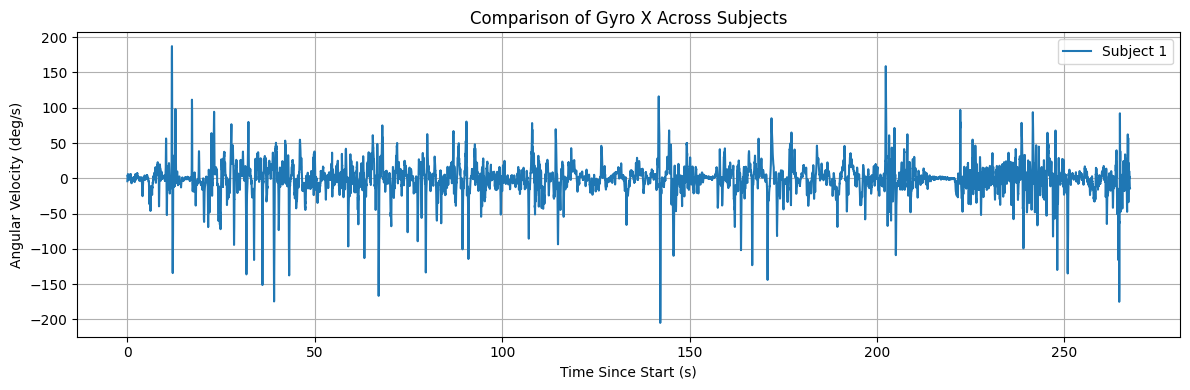

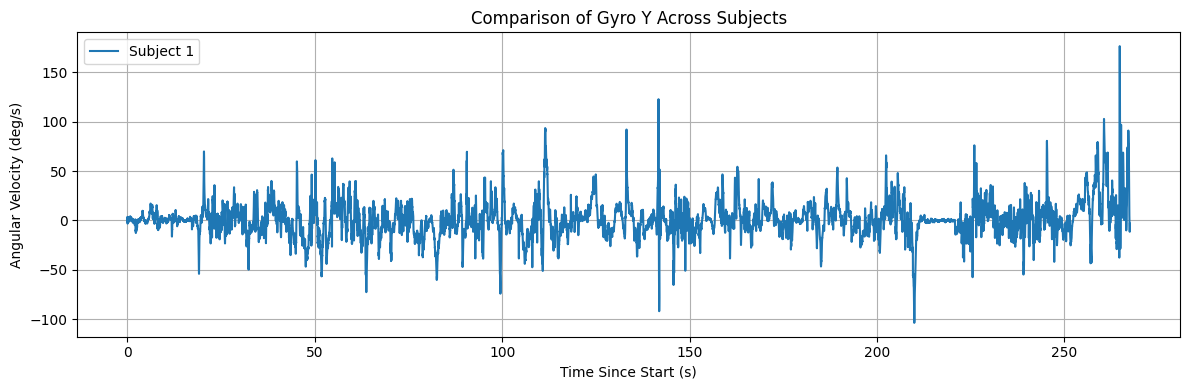

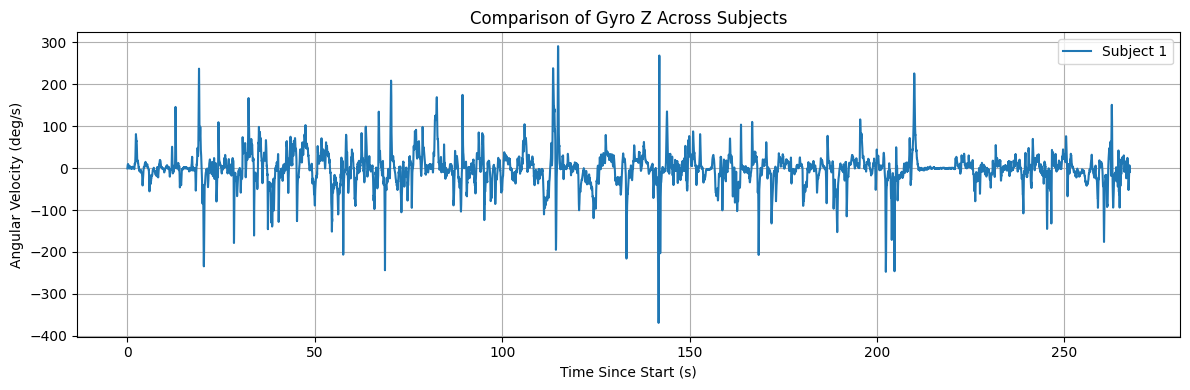

In [43]:
normalize_time = True

# Make a copy so original data is unchanged
df_2c = df_2.copy()

if normalize_time:
    df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_2c['timestamp'], df_2c[f'gyro {axis} [deg/s]'], label='Subject 1')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(df_2c['timestamp'], df_2c['angular_speed'], label='Angular Speed')
plt.plot(df_2c['timestamp'].iloc[peaks2], df_2c['angular_speed'].iloc[peaks2], "rx", label="Detected Movements")
plt.title("Detected Head Movements")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
num_movements = len(peaks2)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_2c['timestamp'].iloc[peaks2].values,
    'angular_speed': df_2c['angular_speed'].iloc[peaks2].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 450

Descriptive Statistics of Detected Movements (Angular Speed):
count    450.000000
mean      89.405717
std       46.954642
min       50.032685
25%       60.076871
50%       72.920803
75%       98.387598
max      401.508228
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    449.000000
mean       0.589704
std        0.978709
min        0.015192
25%        0.088503
50%        0.257769
75%        0.693416
max       11.967336
dtype: float64


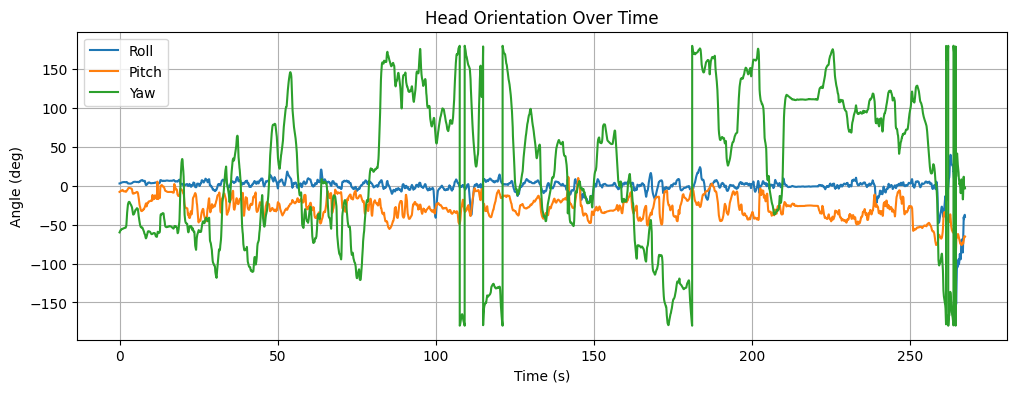

In [47]:
plt.figure(figsize=(12, 4))
plt.plot(df_2c['timestamp'], df_2c['roll [deg]'], label='Roll')
plt.plot(df_2c['timestamp'], df_2c['pitch [deg]'], label='Pitch')
plt.plot(df_2c['timestamp'], df_2c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Subject3

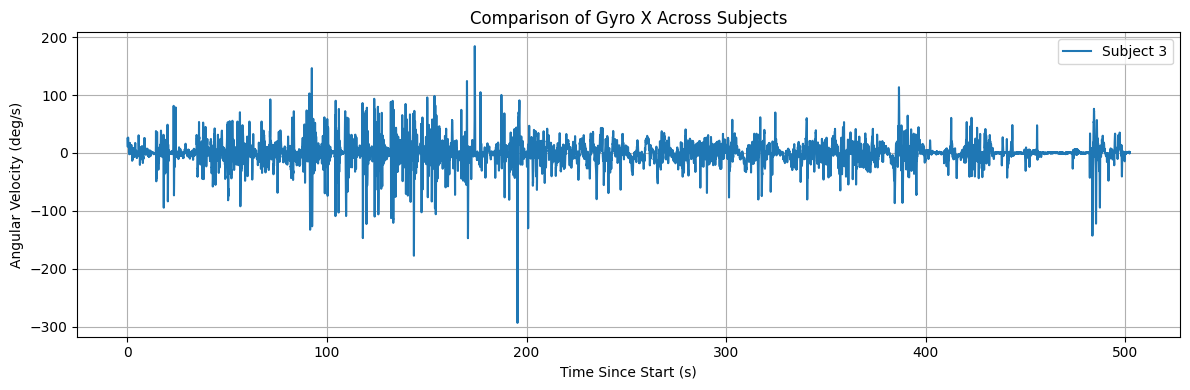

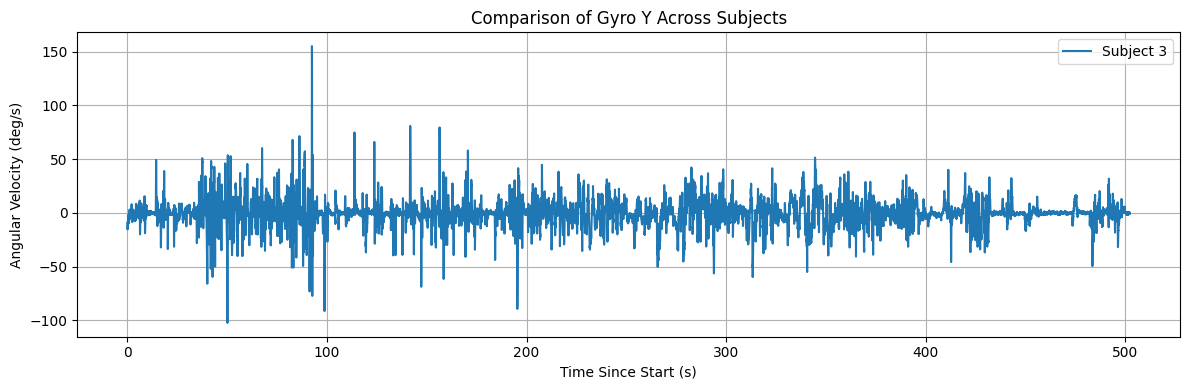

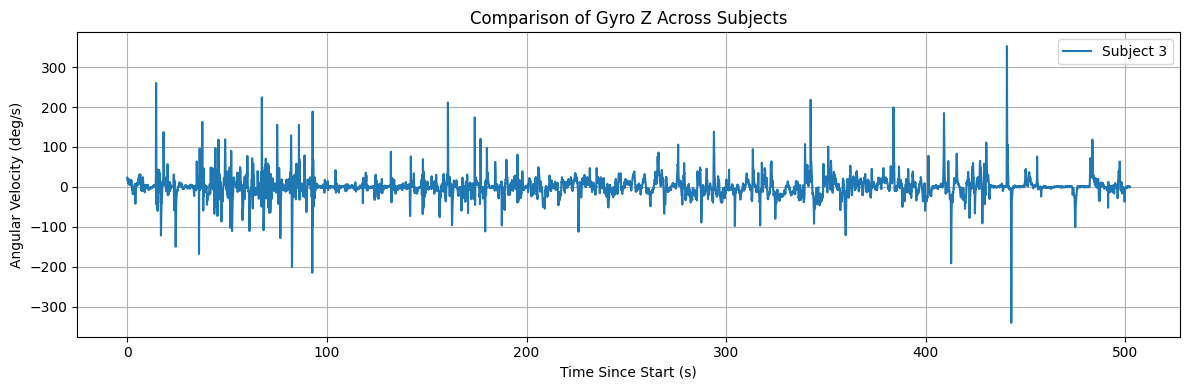

In [54]:
normalize_time = True

# Make a copy so original data is unchanged
df_3c = df_3.copy()

if normalize_time:
    df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_3c['timestamp'], df_3c[f'gyro {axis} [deg/s]'], label='Subject 3')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

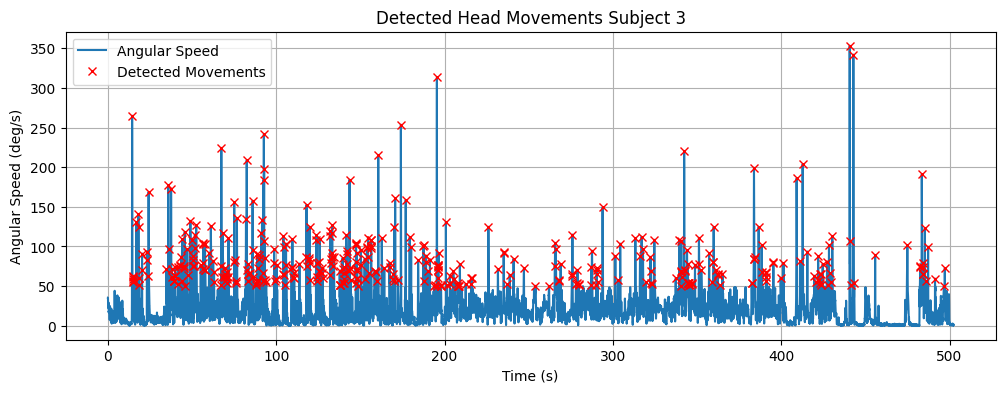

In [53]:
plt.figure(figsize=(12, 4))
plt.plot(df_3c['timestamp'], df_3c['angular_speed'], label='Angular Speed')
plt.plot(df_3c['timestamp'].iloc[peaks3], df_3c['angular_speed'].iloc[peaks3], "rx", label="Detected Movements")
plt.title("Detected Head Movements Subject 3")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
num_movements = len(peaks3)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_3c['timestamp'].iloc[peaks3].values,
    'angular_speed': df_3c['angular_speed'].iloc[peaks3].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 400

Descriptive Statistics of Detected Movements (Angular Speed):
count    400.000000
mean      85.123269
std       41.248932
min       50.053250
25%       59.521992
50%       73.820068
75%       96.258274
max      353.337417
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    399.000000
mean       1.210027
std        2.215476
min        0.015276
25%        0.144251
50%        0.332045
75%        1.383066
max       19.114511
dtype: float64


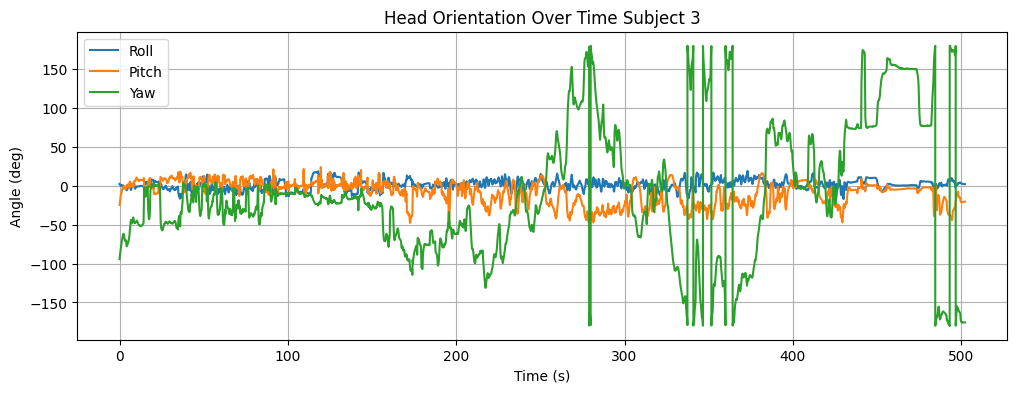

In [52]:
plt.figure(figsize=(12, 4))
plt.plot(df_3c['timestamp'], df_3c['roll [deg]'], label='Roll')
plt.plot(df_3c['timestamp'], df_3c['pitch [deg]'], label='Pitch')
plt.plot(df_3c['timestamp'], df_3c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time Subject 3')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Subject 4

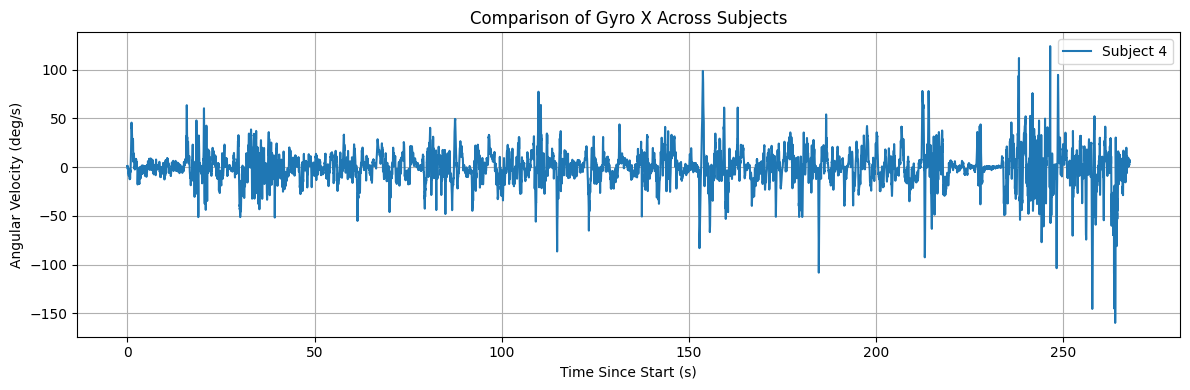

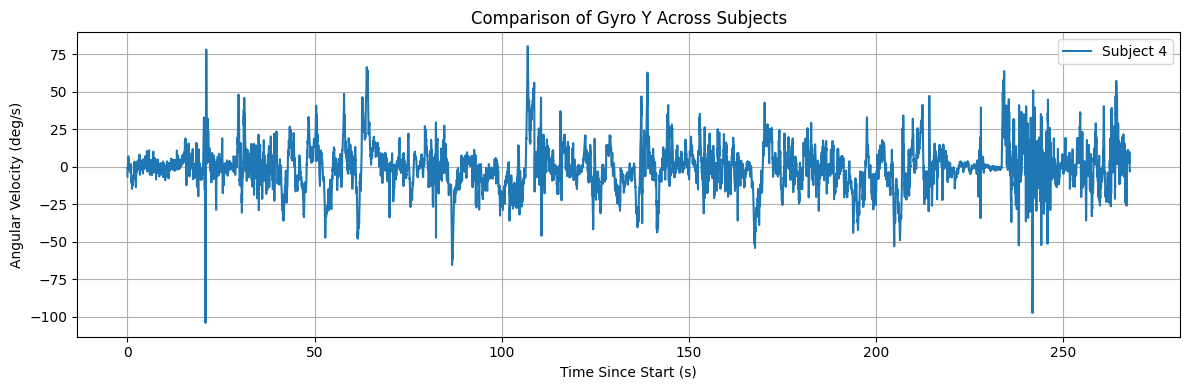

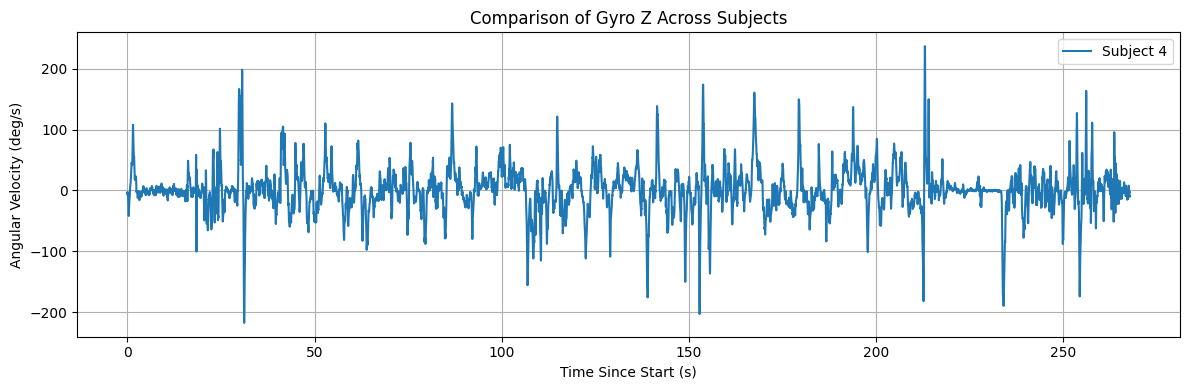

In [55]:
normalize_time = True

# Make a copy so original data is unchanged
df_4c = df_4.copy()

if normalize_time:
    df_4c['timestamp'] -= df_4c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_4c['timestamp'], df_4c[f'gyro {axis} [deg/s]'], label='Subject 4')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

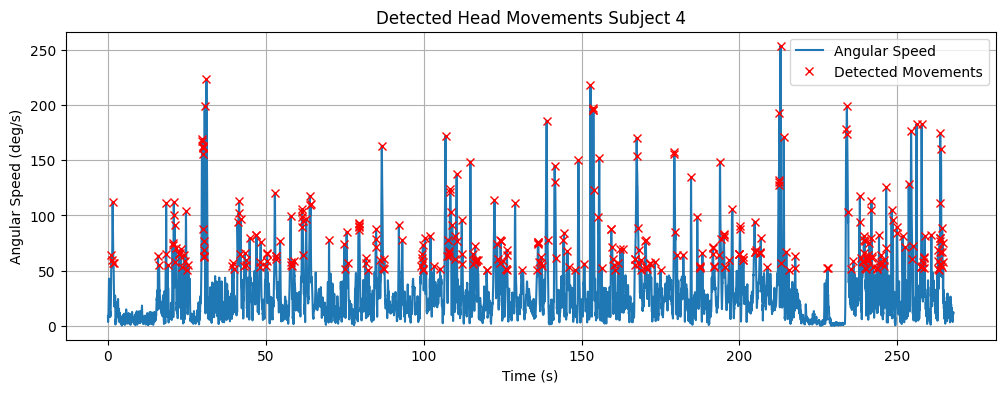

In [56]:
plt.figure(figsize=(12, 4))
plt.plot(df_4c['timestamp'], df_4c['angular_speed'], label='Angular Speed')
plt.plot(df_4c['timestamp'].iloc[peaks4], df_4c['angular_speed'].iloc[peaks4], "rx", label="Detected Movements")
plt.title("Detected Head Movements Subject 4")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
num_movements = len(peaks4)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_4c['timestamp'].iloc[peaks4].values,
    'angular_speed': df_4c['angular_speed'].iloc[peaks4].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 351

Descriptive Statistics of Detected Movements (Angular Speed):
count    351.000000
mean      81.933272
std       37.224239
min       50.204221
25%       57.451541
50%       66.572784
75%       89.848104
max      253.566809
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    350.000000
mean       0.752276
std        1.395875
min        0.015188
25%        0.075935
50%        0.234357
75%        0.818878
max       14.078010
dtype: float64


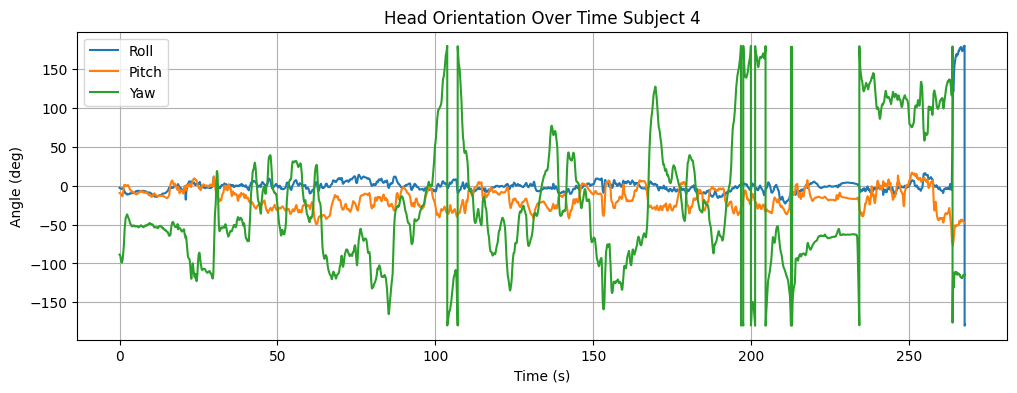

In [60]:
plt.figure(figsize=(12, 4))
plt.plot(df_4c['timestamp'], df_4c['roll [deg]'], label='Roll')
plt.plot(df_4c['timestamp'], df_4c['pitch [deg]'], label='Pitch')
plt.plot(df_4c['timestamp'], df_4c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time Subject 4')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Subject 5

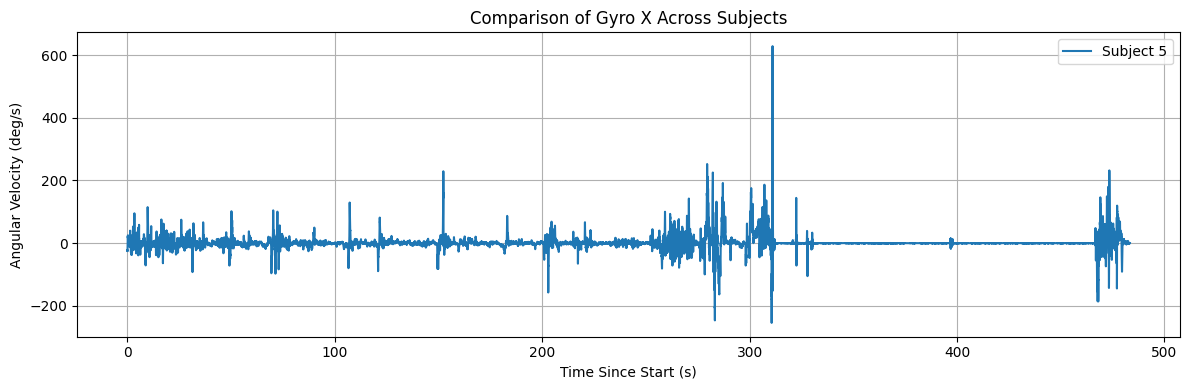

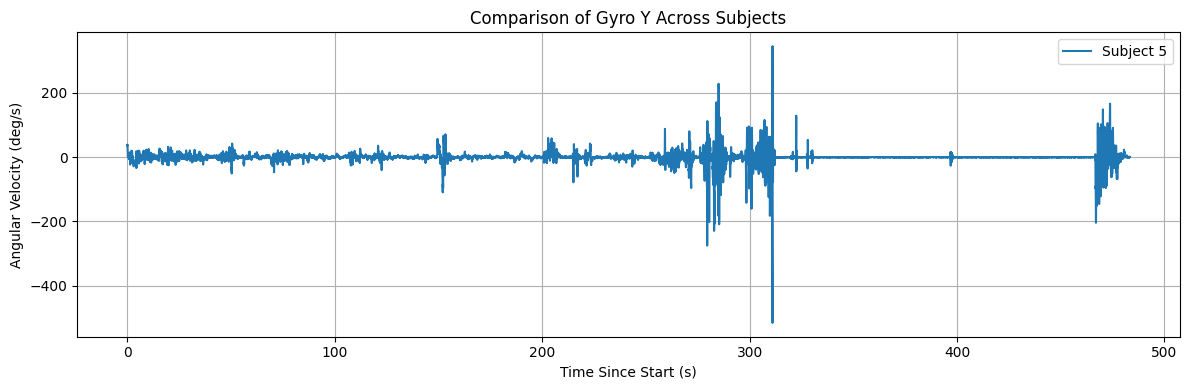

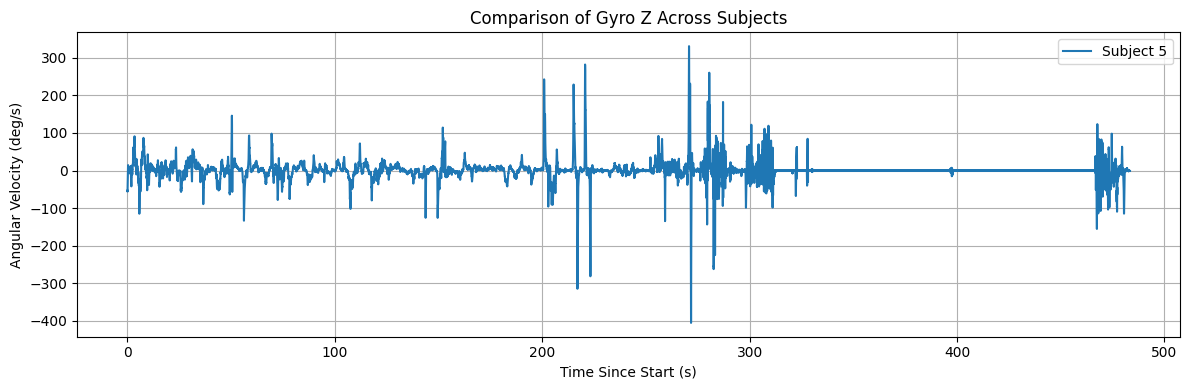

In [61]:
normalize_time = True

# Make a copy so original data is unchanged
df_5c = df_5.copy()

if normalize_time:
    df_5c['timestamp'] -= df_5c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_5c['timestamp'], df_5c[f'gyro {axis} [deg/s]'], label='Subject 5')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

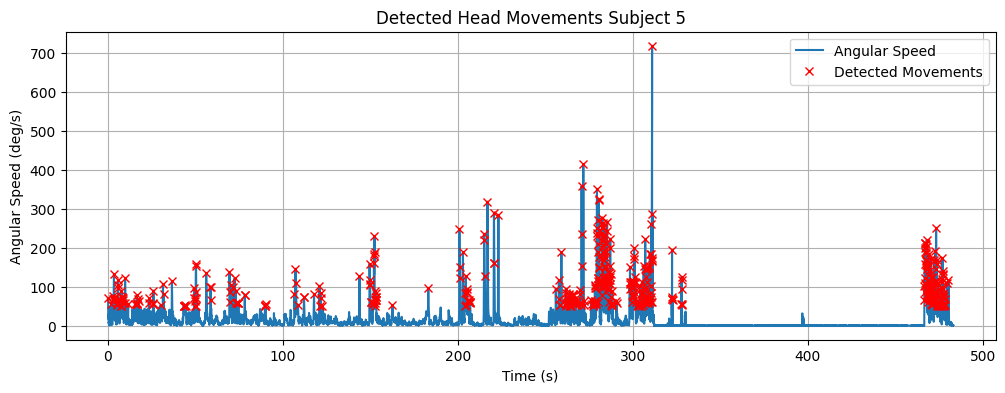

In [62]:
plt.figure(figsize=(12, 4))
plt.plot(df_5c['timestamp'], df_5c['angular_speed'], label='Angular Speed')
plt.plot(df_5c['timestamp'].iloc[peaks5], df_5c['angular_speed'].iloc[peaks5], "rx", label="Detected Movements")
plt.title("Detected Head Movements Subject 5")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
num_movements = len(peaks5)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_5c['timestamp'].iloc[peaks5].values,
    'angular_speed': df_5c['angular_speed'].iloc[peaks5].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 470

Descriptive Statistics of Detected Movements (Angular Speed):
count    470.000000
mean     108.133072
std       66.811611
min       50.015381
25%       61.940338
50%       85.271862
75%      127.378424
max      718.131849
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    469.000000
mean       1.024358
std        6.898143
min        0.012728
25%        0.063013
50%        0.117887
75%        0.255850
max      138.674172
dtype: float64


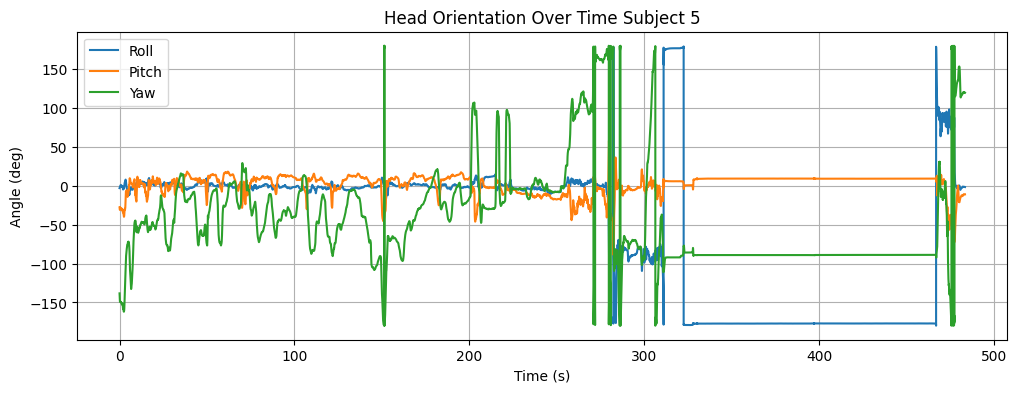

In [64]:
plt.figure(figsize=(12, 4))
plt.plot(df_5c['timestamp'], df_5c['roll [deg]'], label='Roll')
plt.plot(df_5c['timestamp'], df_5c['pitch [deg]'], label='Pitch')
plt.plot(df_5c['timestamp'], df_5c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time Subject 5')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Subject6

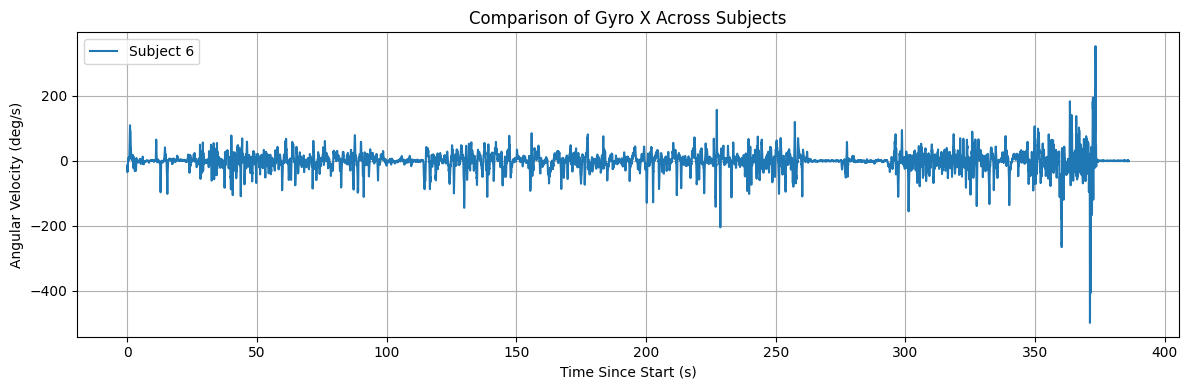

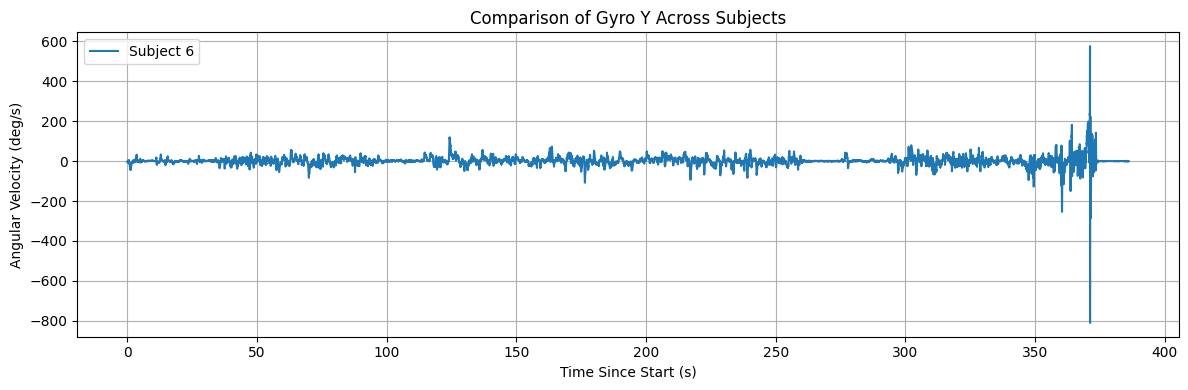

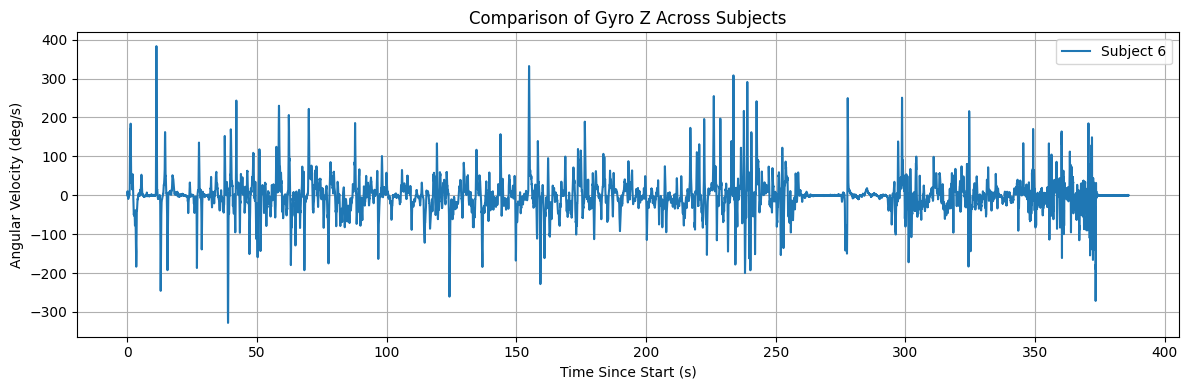

In [65]:
normalize_time = True

# Make a copy so original data is unchanged
df_6c = df_6.copy()

if normalize_time:
    df_6c['timestamp'] -= df_6c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_6c['timestamp'], df_6c[f'gyro {axis} [deg/s]'], label='Subject 6')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

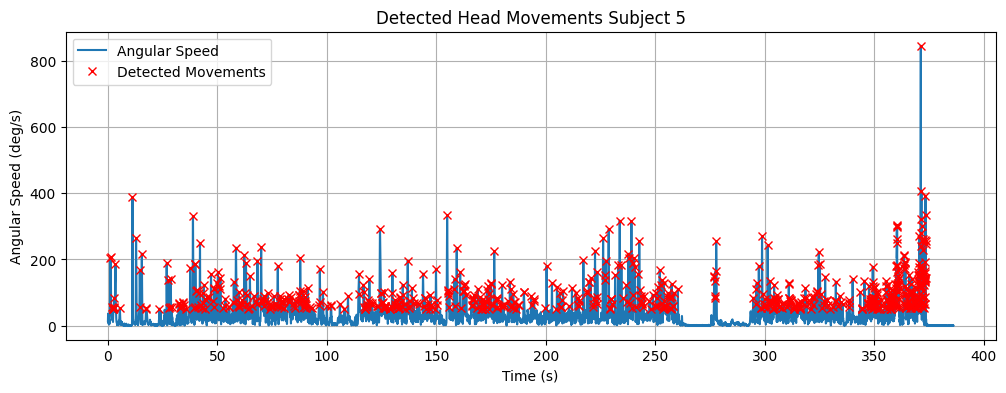

In [66]:
plt.figure(figsize=(12, 4))
plt.plot(df_6c['timestamp'], df_6c['angular_speed'], label='Angular Speed')
plt.plot(df_6c['timestamp'].iloc[peaks6], df_6c['angular_speed'].iloc[peaks6], "rx", label="Detected Movements")
plt.title("Detected Head Movements Subject 5")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
num_movements = len(peaks6)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_6c['timestamp'].iloc[peaks6].values,
    'angular_speed': df_6c['angular_speed'].iloc[peaks6].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 735

Descriptive Statistics of Detected Movements (Angular Speed):
count    735.000000
mean     100.588638
std       64.183059
min       50.009837
25%       60.206769
50%       78.193352
75%      119.149356
max      844.631702
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    734.000000
mean       0.507353
std        1.093605
min        0.007728
25%        0.080595
50%        0.228688
75%        0.534416
max       16.961122
dtype: float64


In [68]:
plt.figure(figsize=(12, 4))
plt.plot(df_6c['timestamp'], df_6c['roll [deg]'], label='Roll')
plt.plot(df_6c['timestamp'], df_6c['pitch [deg]'], label='Pitch')
plt.plot(df_6c['timestamp'], df_6c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time Subject 6')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Subject7

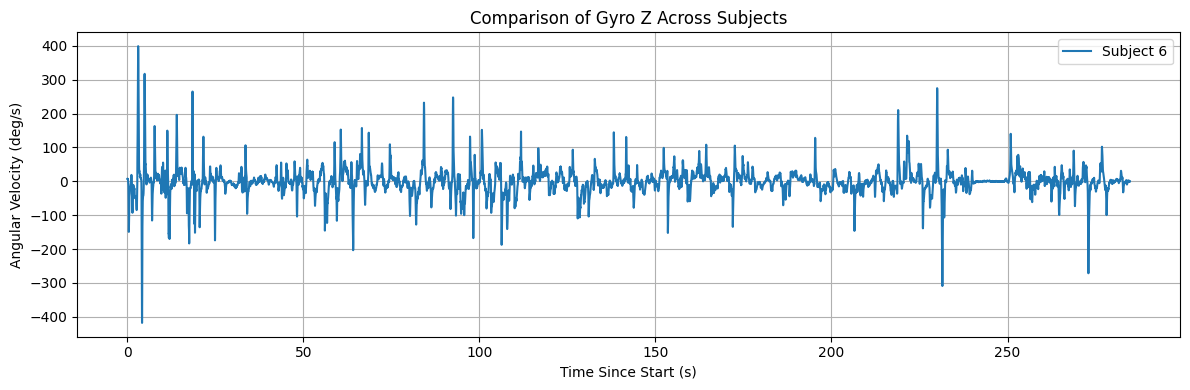

In [69]:
normalize_time = True

# Make a copy so original data is unchanged
df_7c = df_7.copy()

if normalize_time:
    df_7c['timestamp'] -= df_7c['timestamp'].iloc[0]
    
# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_7c['timestamp'], df_7c[f'gyro {axis} [deg/s]'], label='Subject 6')
        
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')

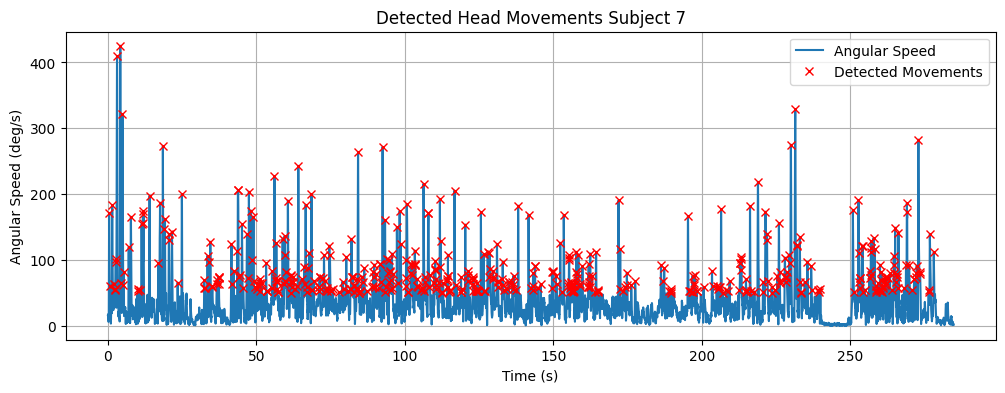

In [70]:
plt.figure(figsize=(12, 4))
plt.plot(df_7c['timestamp'], df_7c['angular_speed'], label='Angular Speed')
plt.plot(df_7c['timestamp'].iloc[peaks7], df_7c['angular_speed'].iloc[peaks7], "rx", label="Detected Movements")
plt.title("Detected Head Movements Subject 7")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
num_movements = len(peaks7)
print(f"Number of head movements detected: {num_movements}")

# 2. Save to DataFrame or list
movements = pd.DataFrame({
    'timestamp': df_7c['timestamp'].iloc[peaks7].values,
    'angular_speed': df_7c['angular_speed'].iloc[peaks7].values
})

# Optional: If you want a list instead
movements_list = list(zip(movements['timestamp'], movements['angular_speed']))

# 3. Descriptive statistics on angular speed
stats = movements['angular_speed'].describe()
print("\nDescriptive Statistics of Detected Movements (Angular Speed):")
print(stats)

# 4. Optional: Time intervals between movements
time_diffs = np.diff(movements['timestamp'])
time_stats = pd.Series(time_diffs).describe()
print("\nTime Differences Between Movements:")
print(time_stats)

Number of head movements detected: 516

Descriptive Statistics of Detected Movements (Angular Speed):
count    516.000000
mean      87.367912
std       49.453209
min       50.017444
25%       57.140110
50%       68.891230
75%       94.887069
max      425.377943
Name: angular_speed, dtype: float64

Time Differences Between Movements:
count    515.000000
mean       0.539290
std        0.945559
min        0.004900
25%        0.095998
50%        0.231650
75%        0.658911
max       10.951832
dtype: float64


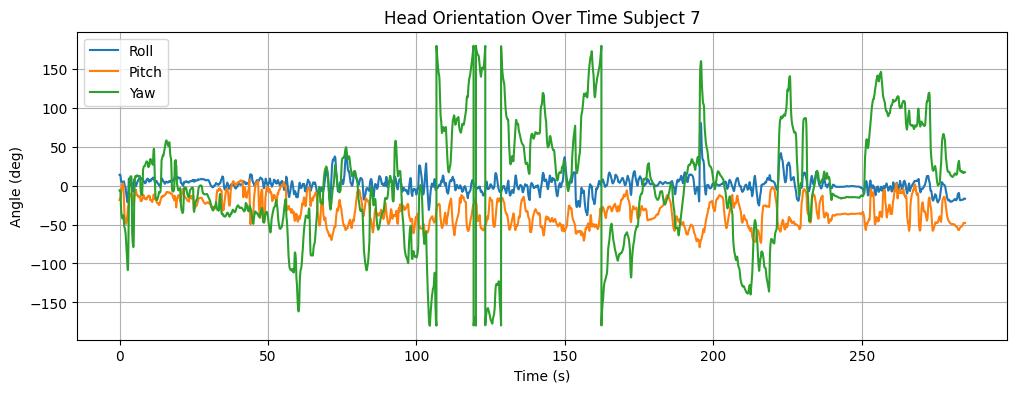

In [72]:
plt.figure(figsize=(12, 4))
plt.plot(df_7c['timestamp'], df_7c['roll [deg]'], label='Roll')
plt.plot(df_7c['timestamp'], df_7c['pitch [deg]'], label='Pitch')
plt.plot(df_7c['timestamp'], df_7c['yaw [deg]'], label='Yaw')
plt.title('Head Orientation Over Time Subject 7')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

## Head movement all subjects

In [73]:
subject_data = []

for i in range(1, 7):  
    df = globals()[f'df_{i}c']  
    peaks = globals()[f'peaks{i}']  
    
    num_movements = len(peaks)
    subject_data.append({'Subject': f'Subject_{i}', 'Movements': num_movements})

# Create a DataFrame for comparison
summary_df = pd.DataFrame(subject_data)
print(summary_df)


     Subject  Movements
0  Subject_1        521
1  Subject_2        450
2  Subject_3        400
3  Subject_4        351
4  Subject_5        470
5  Subject_6        735


In [74]:
print("\nDescriptive Statistics on Number of Head Movements:")
print(summary_df['Movements'].describe())


Descriptive Statistics on Number of Head Movements:
count      6.000000
mean     487.833333
std      134.446148
min      351.000000
25%      412.500000
50%      460.000000
75%      508.250000
max      735.000000
Name: Movements, dtype: float64


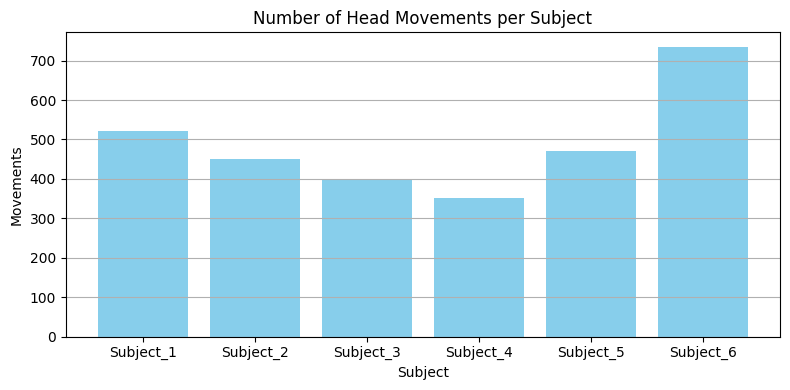

In [75]:
plt.figure(figsize=(8, 4))
plt.bar(summary_df['Subject'], summary_df['Movements'], color='skyblue')
plt.title('Number of Head Movements per Subject')
plt.ylabel('Movements')
plt.xlabel('Subject')
plt.grid(axis='y')
plt.tight_layout()
plt.show()